In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler


pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [68]:
#import the dataset
pay = pd.read_csv("//Users//kingsley//Documents//Hackathon//payments.csv")

pay['PAY_DATE'] = pay['PAY_DATE'].astype('datetime64[ns]')

pay['PAY'] = [p.replace(',','.') for p in pay['PAY']]
pay['PAY'] = pay['PAY'].astype('float64')
pay['PAY'] = ['{:.4f}'.format(pa) for pa in pay['PAY']]
pay['PAY'] = pay['PAY'].astype('float64')

pay

/Users/kingsley/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '13.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/Users/kingsley/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '14.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/Users/kingsley/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '15.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/Users/kingsley/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '16.01.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).valu

,PAY,CNT,PAY_DATE
0,31.5778,25,2012-01-01
1,108.1086,133,2012-02-01
2,53.8621,51,2012-03-01
3,143.8577,106,2012-04-01
4,172.5295,165,2012-05-01
...,...,...,...
3738,40525.8354,31691,2022-03-27
3739,58266.6178,44599,2022-03-28
3740,50635.1406,36738,2022-03-29
3741,41309.8073,31901,2022-03-30


In [60]:
# pay['day'] = [date.strftime('%d') for date in pay['PAY_DATE']]

# pay['week'] = [date.strftime('%W') for date in pay['PAY_DATE']]

pay['month'] = [date.strftime('%Y-%m') for date in pay['PAY_DATE']]

pay['year'] = [date.strftime('%Y') for date in pay['PAY_DATE']]


pay

,PAY,CNT,PAY_DATE,month,year
0,31.5778,25,2012-01-01,2012-01,2012
1,108.1086,133,2012-02-01,2012-02,2012
2,53.8621,51,2012-03-01,2012-03,2012
3,143.8577,106,2012-04-01,2012-04,2012
4,172.5295,165,2012-05-01,2012-05,2012
...,...,...,...,...,...
3738,40525.8354,31691,2022-03-27,2022-03,2022
3739,58266.6178,44599,2022-03-28,2022-03,2022
3740,50635.1406,36738,2022-03-29,2022-03,2022
3741,41309.8073,31901,2022-03-30,2022-03,2022


In [61]:
# day_agg_pay = pay.groupby(['day']).agg(total_value = ('PAY', 'sum')).reset_index()

# day_agg_pay

In [62]:
# week_agg_pay = pay.groupby(['week']).agg(total_value = ('PAY', 'sum')).reset_index()

# week_agg_pay

In [63]:
month_agg_pay = pay.groupby(['month']).agg(total_payment = ('PAY', 'sum'), total_customer = ('CNT', 'sum')).reset_index()

month_agg_pay['month_num'] = [str(month).split('-')[1] for month in month_agg_pay['month']]

month_agg_pay.sort_values('month_num', ascending = True)

,month,total_payment,total_customer,month_num
0,2012-01,974815.5021,1029824,01
72,2018-01,1772897.7429,1929918,01
48,2016-01,1621590.5429,1704281,01
84,2019-01,1856136.9898,2099218,01
36,2015-01,1444961.5553,1603670,01
...,...,...,...,...
95,2019-12,2114589.5992,2367138,12
59,2016-12,1740342.9761,1705803,12
23,2013-12,1168223.2350,1315204,12
83,2018-12,1921138.4902,2156430,12


### January forecast

,index,month,total_payment,total_customer,month_num
0,0,2012-01,974815.5021,1029824,01
1,12,2013-01,1114155.2455,1310283,01
2,24,2014-01,1379523.8699,1587310,01
3,36,2015-01,1444961.5553,1603670,01
4,48,2016-01,1621590.5429,1704281,01
5,60,2017-01,1702463.6789,1708814,01
6,72,2018-01,1772897.7429,1929918,01
7,84,2019-01,1856136.9898,2099218,01
8,96,2020-01,1884522.4819,2107648,01
9,108,2021-01,2050935.4374,2039831,01


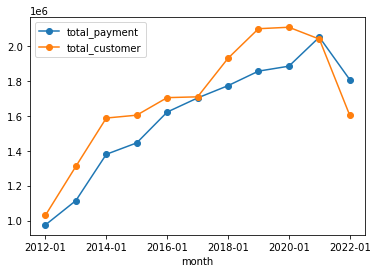

In [64]:
# extracting only January figures from our aggregated dataframe
jan_plt = month_agg_pay[month_agg_pay['month_num'] == '01'].reset_index() 

# visualizing the trend of total payments and total customers across all Januaries
jan_plt.plot.line(x= 'month', y = ['total_payment', 'total_customer'], marker='o', label=['total_payment', 'total_customer']) 

plt.savefig('january_trend.png') # save plot figure as png to current path

jan_plt

In [65]:
## filter the table to only relevant features 
jan_plt[['total_customer', 'total_payment']]

,total_customer,total_payment
0,1029824,974815.5021
1,1310283,1114155.2455
2,1587310,1379523.8699
3,1603670,1444961.5553
4,1704281,1621590.5429
5,1708814,1702463.6789
6,1929918,1772897.7429
7,2099218,1856136.9898
8,2107648,1884522.4819
9,2039831,2050935.4374


In [66]:
# splitting our dataframe to features (x) and output(y)
x = jan_plt[['total_customer', 'total_payment',]].iloc[:, 0].values
y = jan_plt[['total_customer', 'total_payment',]].iloc[:, -1].values

# reshape the matrix to 1-dimension so that we can transform using stanadardscaler
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [67]:
# creating the standard scaler object to transform our x and y varibales
sc = StandardScaler()
x_trans = sc.fit_transform(x)
y_trans = sc.fit_transform(y)

In [11]:
# importing the train and test split model to be used in creating our train and test set from the transformed data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size = 0.3)

In [12]:
from sklearn.linear_model import LinearRegression

# building our linear model using the train set
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
# visualizing our model coefficient and intercept
print(f'''Linear model btw total_payment & total_customer for January:  
Y = {'{:.4f}'.format(lr.coef_[0][0])}x + {'{:.4f}'.format(lr.intercept_[0])}''')

Linear model btw total_payment & total_customer for January:  
Y = 1.0632x + -0.0907


In [14]:
# using our linear to predict from our test set
y_pred = lr.predict(x_test)
y_pred

array([[-0.4178146 ],
       [ 1.2565713 ],
       [-2.32432571],
       [-0.42155224]])

In [15]:
# testing our  model accuracy
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

MAPE = mean_absolute_percentage_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Mean absolute percentage error: ','{:.4f}'.format(MAPE))
print('Mean squared error: ', '{:.4f}'.format(MSE))

Mean absolute percentage error:  0.6022
Mean squared error:  0.3542


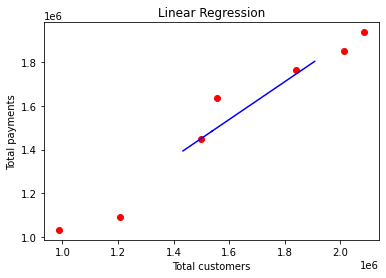

,test_total_customers,test_total_pmt,pred_total_pmt
0,1434002.3468,1349329.6278,1394332.9580
1,1537613.0279,1853774.8688,1483787.1293
2,1536914.2109,1605164.7404,1483183.7929
3,1908052.3942,2043760.9707,1803612.7125


In [70]:
# inverting our variables back to the original form to properly visualize their relationship
xtr_inv = sc.inverse_transform(x_train)
ytr_inv = sc.inverse_transform(y_train)

xt_inv = sc.inverse_transform(x_test)
yt_inv = sc.inverse_transform(y_test)

ypr_inv = sc.inverse_transform(y_pred)

inv_df = pd.concat([pd.DataFrame(xt_inv).rename(columns = {0: 'test_total_customers'}),
                   pd.DataFrame(yt_inv).rename(columns = {0: 'test_total_pmt'}),
                   pd.DataFrame(ypr_inv).rename(columns = {0: 'pred_total_pmt'})], axis = 1)


plt.scatter(xtr_inv, ytr_inv, color = 'red')
plt.plot(xt_inv, ypr_inv, color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Total customers')
plt.ylabel('Total payments')
plt.show()

inv_df

### February forecast

,index,month,total_payment,total_customer,month_num
0,1,2012-02,964714.8891,997214,02
1,13,2013-02,1017042.4215,1195391,02
2,25,2014-02,1255885.6451,1399727,02
3,37,2015-02,1347120.2174,1459702,02
4,49,2016-02,1491314.1902,1492799,02
5,61,2017-02,1519135.0713,1510609,02
6,73,2018-02,1636568.6690,1766720,02
7,85,2019-02,1717217.0224,1924110,02
8,97,2020-02,1796672.4124,1988596,02
9,109,2021-02,1894925.9985,1828451,02


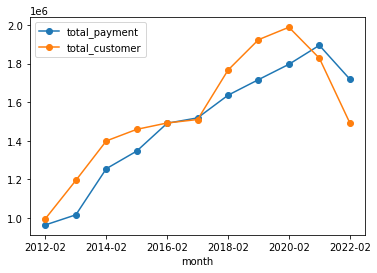

In [29]:
feb_plt = month_agg_pay[month_agg_pay['month_num'] == '02'].reset_index()

feb_plt.plot.line(x= 'month', y = ['total_payment', 'total_customer'], marker='o', label=['total_payment', 'total_customer'])

plt.savefig('february_trend.png')

feb_plt

In [50]:
feb_plt[['total_customer', 'total_payment']]

,total_customer,total_payment
0,997214,964714.8891
1,1195391,1017042.4215
2,1399727,1255885.6451
3,1459702,1347120.2174
4,1492799,1491314.1902
5,1510609,1519135.0713
6,1766720,1636568.6690
7,1924110,1717217.0224
8,1988596,1796672.4124
9,1828451,1894925.9985


In [51]:
x = feb_plt[['total_customer', 'total_payment',]].iloc[:, 0].values
y = feb_plt[['total_customer', 'total_payment',]].iloc[:, -1].values

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [52]:
sc = StandardScaler()
x_trans = sc.fit_transform(x)
y_trans = sc.fit_transform(y)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size = 0.3)

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
print(f'''Linear model btw total_payment & total_customer for february:  
Y = {'{:.4f}'.format(lr.coef_[0][0])}x + {'{:.4f}'.format(lr.intercept_[0])}''')

Linear model btw total_payment & total_customer for february:  
Y = 0.8634x + -0.1946


In [56]:
y_pred = lr.predict(x_test)

In [57]:
# testing  model accuracy
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

MAPE = mean_absolute_percentage_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Mean absolute percentage error: ','{:.4f}'.format(MAPE))
print('Mean squared error: ', '{:.4f}'.format(MSE))

Mean absolute percentage error:  7.5993
Mean squared error:  0.5132


In [48]:
xtr_inv = sc.inverse_transform(x_train)
ytr_inv = sc.inverse_transform(y_train)

xt_inv = sc.inverse_transform(x_test)
yt_inv = sc.inverse_transform(y_test)

ypr_inv = sc.inverse_transform(y_pred)

inv_df = pd.concat([pd.DataFrame(xt_inv).rename(columns = {0: 'test_total_customers'}),
                   pd.DataFrame(yt_inv).rename(columns = {0: 'test_total_pmt'}),
                   pd.DataFrame(ypr_inv).rename(columns = {0: 'pred_total_pmt'})], axis = 1)

inv_df

,test_total_customers,test_total_pmt,pred_total_pmt
0,1707229.2767,1636568.6690,1686749.1379
1,1770042.1528,1894925.9985,1744870.6794
2,1428507.6321,1491314.1902,1428844.5071
3,1867377.6393,1717217.0224,1834936.4249


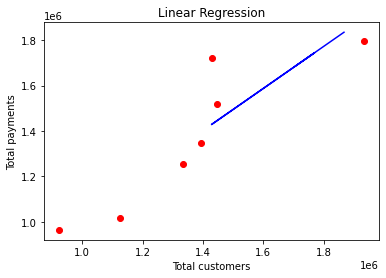

In [49]:
plt.scatter(xtr_inv, ytr_inv, color = 'red')
plt.plot(xt_inv, ypr_inv, color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Total customers')
plt.ylabel('Total payments')
plt.show()

### March Forecast

,index,month,total_payment,total_customer,month_num
0,2,2012-03,1006197.8775,1068532,03
1,14,2013-03,976657.5800,1229215,03
2,26,2014-03,1285890.0680,1480375,03
3,38,2015-03,1368945.9098,1554142,03
4,50,2016-03,1457344.0141,1555180,03
5,62,2017-03,1619846.2757,1670707,03
6,74,2018-03,1771368.3490,1963874,03
7,86,2019-03,1799578.7202,2094278,03
8,98,2020-03,1778002.3782,2003920,03
9,110,2021-03,1966364.0804,1922049,03


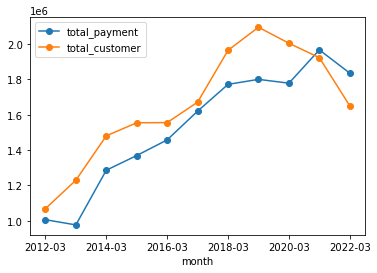

In [20]:
Mar_plt = month_agg_pay[month_agg_pay['month_num'] == '03'].reset_index()

Mar_plt.plot.line(x= 'month', y = ['total_payment', 'total_customer'], marker='o', label=['total_payment', 'total_customer'])

##plt.savefig('March_trend.png')

Mar_plt

In [22]:
## filter the table to only relevant features 
Mar_plt[['total_customer', 'total_payment']]

,total_customer,total_payment
0,1068532,1006197.8775
1,1229215,976657.5800
2,1480375,1285890.0680
3,1554142,1368945.9098
4,1555180,1457344.0141
5,1670707,1619846.2757
6,1963874,1771368.3490
7,2094278,1799578.7202
8,2003920,1778002.3782
9,1922049,1966364.0804


In [24]:
x = Mar_plt[['total_customer', 'total_payment',]].iloc[:, 0].values
y = Mar_plt[['total_customer', 'total_payment',]].iloc[:, -1].values

x = x.reshape(-1,1)
y = y.reshape(-1,1)